In [1]:
# Este comando descarga el repositorio entero a una carpeta llamada 'TFMDS' en Colab.
#!git clone https://github.com/jmorala/TFMDS.git

# Inicializar directorios
Clonar repositorio github
Posicionarse en el directorio raíz

In [2]:
import os

# Detectar si estamos en Google Colab
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

# Configurar el directorio de trabajo según el entorno
if IN_COLAB:
    os.chdir('TFMDS')
else:
    # En VS Code local, nos movemos al directorio raíz del proyecto
    # Usa raw string para evitar errores de escape en rutas Windows
    current_dir = r'C:\Users\jmora\Documents\TFMDS'
    os.chdir(current_dir)

# OPCIONAL: Para verificar que estás en la ruta correcta y ver las carpetas
print("Directorio de trabajo actual:", os.getcwd())

Directorio de trabajo actual: C:\Users\jmora\Documents\TFMDS


# Análisis Descriptivo y Estadístico

En una prinera fase se realizan estadísticas resumidas para comprender la distribución y dispersión de los valores sin estructura temporal.
Después se realiza la Visualización y Análisis Específico de Series Temporales


## Lectura de fichero y adaptación de los tipos


In [3]:
import pandas as pd

# Ruta relativa del archivo CSV
RUTA_DATOS = 'datos/STDatosVentasTienda.csv'

# Cargar el archivo en un DataFrame de Pandas
dfSTventas = pd.read_csv(RUTA_DATOS, sep=';',
    parse_dates=['idSecuencia'])  

# Convertir la columna anio_mes a período mensual
dfSTventas['anio_mes'] = pd.to_datetime(dfSTventas['anio_mes']).dt.to_period('M')

# Muestra las primeras filas y la información de las columnas para iniciar la exploración
print("Primeras filas del DataFrame:")
print(dfSTventas.head())

print("\nInformación de las columnas y tipos de datos:")
dfSTventas.info()

Primeras filas del DataFrame:
  idSecuencia  producto  udsVenta  bolPromocion  bolOpen  bolHoliday  \
0  2022-11-06         1         0             1        0           1   
1  2022-11-07         1        12             1        1           0   
2  2022-11-08         1        28             1        1           0   
3  2022-11-09         1        14             1        1           0   
4  2022-11-10         1        26             1        1           0   

   udsStock  rotura_stock anio_mes  
0       148         False  2022-11  
1       148         False  2022-11  
2       136         False  2022-11  
3       306         False  2022-11  
4       291         False  2022-11  

Información de las columnas y tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653514 entries, 0 to 653513
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   idSecuencia   653514 non-null  datetime64[ns]
 1   

## Análisis descriptivo

### Análisis de unidades de venta de todos los productos


Estadísticas descriptivas de udsVenta:
count    653514.000000
mean          1.475795
std           2.698672
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         181.000000
Name: udsVenta, dtype: float64

Estadísticas descriptivas de idSecuencia:
count                           653514
mean     2023-11-05 23:59:59.999999744
min                2022-11-06 00:00:00
25%                2023-05-07 00:00:00
50%                2023-11-06 00:00:00
75%                2024-05-07 00:00:00
max                2024-11-05 00:00:00
Name: idSecuencia, dtype: object



Estadísticas descriptivas de udsVenta:
count    653514.000000
mean          1.475795
std           2.698672
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         181.000000
Name: udsVenta, dtype: float64

Estadísticas descriptivas de idSecuencia:
count                           653514
mean     2023-11-05 23:59:59.999999744
min                2022-11-06 00:00:00
25%                2023-05-07 00:00:00
50%                2023-11-06 00:00:00
75%                2024-05-07 00:00:00
max                2024-11-05 00:00:00
Name: idSecuencia, dtype: object


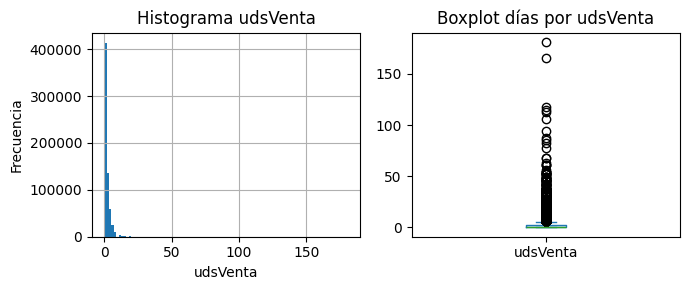


Estadísticas descriptivas de udsVenta:
count    653514.000000
mean          1.475795
std           2.698672
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         181.000000
Name: udsVenta, dtype: float64

Estadísticas descriptivas de idSecuencia:
count                           653514
mean     2023-11-05 23:59:59.999999744
min                2022-11-06 00:00:00
25%                2023-05-07 00:00:00
50%                2023-11-06 00:00:00
75%                2024-05-07 00:00:00
max                2024-11-05 00:00:00
Name: idSecuencia, dtype: object


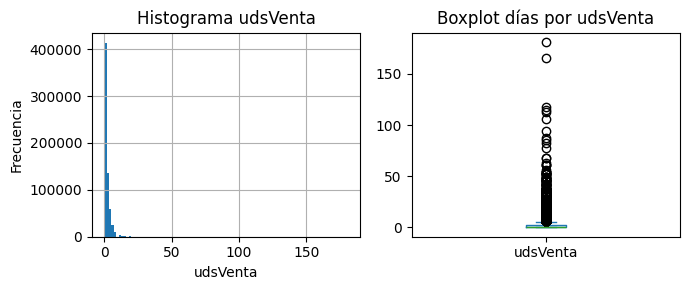

<Axes: xlabel='idSecuencia', ylabel='udsVenta'>


Estadísticas descriptivas de udsVenta:
count    653514.000000
mean          1.475795
std           2.698672
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         181.000000
Name: udsVenta, dtype: float64

Estadísticas descriptivas de idSecuencia:
count                           653514
mean     2023-11-05 23:59:59.999999744
min                2022-11-06 00:00:00
25%                2023-05-07 00:00:00
50%                2023-11-06 00:00:00
75%                2024-05-07 00:00:00
max                2024-11-05 00:00:00
Name: idSecuencia, dtype: object


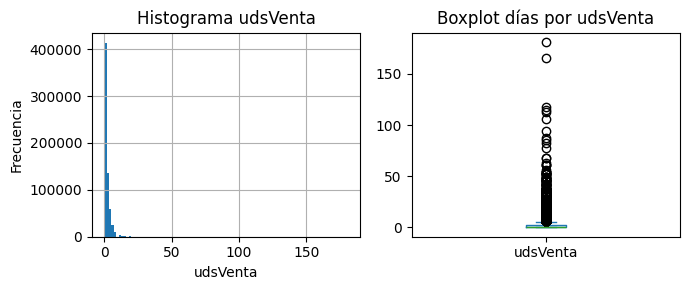

<Axes: xlabel='idSecuencia', ylabel='udsVenta'>

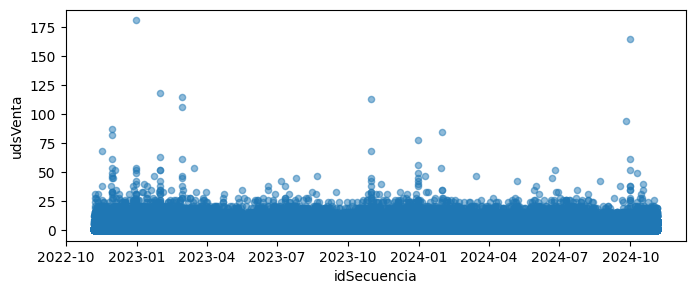

In [4]:
import matplotlib.pyplot as plt

print("\nEstadísticas descriptivas de udsVenta:")
print(dfSTventas.udsVenta.describe())
print("\nEstadísticas descriptivas de idSecuencia:")
print(dfSTventas.idSecuencia.describe())

# Crear tabla de frecuencia de los valores de udsVenta para imprime
""" value_counts = dfSTventas.udsVenta.value_counts().sort_index()
print("\nTabla de frecuencia de udsVenta por día:")
print(value_counts) """

fig, axes = plt.subplots(1, 2, figsize=(7, 3))

# Histograma
dfSTventas.udsVenta.hist(bins=100, ax=axes[0])
axes[0].set_title('Histograma udsVenta')
axes[0].set_xlabel('udsVenta')
axes[0].set_ylabel('Frecuencia')

# Boxplot
dfSTventas.udsVenta.plot.box(ax=axes[1])
axes[1].set_title('Boxplot días por udsVenta')

plt.tight_layout()
plt.show()

# Ventas 
dfSTventas.plot(kind='scatter', x='idSecuencia', y='udsVenta', alpha=0.5, figsize=(8, 3))

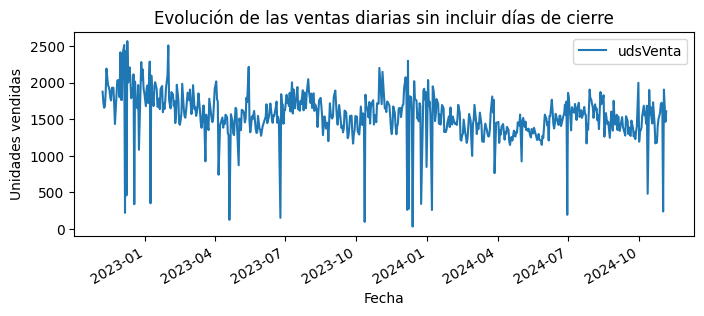

In [5]:
# Gráfico de la suma de ventas diarias, evolución cronológica
dfSTventasPorDia = dfSTventas.groupby('idSecuencia').agg({'udsVenta': 'sum', 'bolOpen': 'sum'}).reset_index()
dfSTventasPorDia[dfSTventasPorDia['bolOpen'] != 0].plot(x='idSecuencia', y='udsVenta', figsize=(8, 3))
plt.title('Evolución de las ventas diarias sin incluir días de cierre')
plt.xlabel('Fecha')
plt.ylabel('Unidades vendidas')
plt.show()

In [6]:
# Mostrar los días con menos ventas, sin contar los días cerrados
dfSTventasPorDia[dfSTventasPorDia['bolOpen'] != 0].nsmallest(10, 'udsVenta')

,idSecuencia,udsVenta,bolOpen
402,2023-12-13,33,894
340,2023-10-12,97,894
165,2023-04-20,125,894
231,2023-06-25,152,894
602,2024-06-30,194,894
30,2022-12-06,220,894
726,2024-11-01,239,894
427,2024-01-07,259,894
395,2023-12-06,261,894
397,2023-12-08,278,894


Revisión valores atípicos

In [7]:
# Revisar las filas con los diez valores máximos de udsVenta
print("\nFilas con los diez valores máximos de udsVenta:")
dfSTventas.nlargest(10, 'udsVenta')


Filas con los diez valores máximos de udsVenta:


,idSecuencia,producto,udsVenta,bolPromocion,bolOpen,bolHoliday,udsStock,rotura_stock,anio_mes
435000,2022-12-31,669,181,0,1,0,49,False,2022-12
435639,2024-09-30,669,165,0,1,0,96,False,2024-09
435031,2023-01-31,669,118,0,1,0,7,False,2023-01
435059,2023-02-28,669,115,0,1,0,113,False,2023-02
435304,2023-10-31,669,113,0,1,0,0,False,2023-10
152162,2023-02-28,228,106,0,1,0,82,False,2023-02
520430,2024-09-25,800,94,0,1,0,188,False,2024-09
434969,2022-11-30,669,87,0,1,0,75,False,2022-11
233640,2024-01-31,358,85,0,1,0,21,False,2024-01
152072,2022-11-30,228,82,0,1,0,66,False,2022-11


Hay dos valores atípicos que resaltan más..... Pero son del mismo producto, puede que sea lógico..

Revisión del la evolución de ventas totales, acumulado por mes

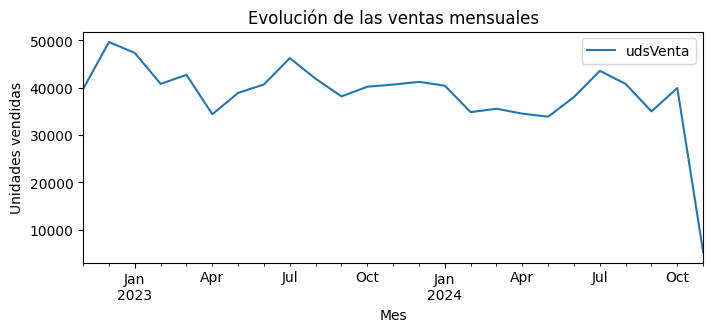

In [8]:
# Crear dataframe con ventas acumuladas por mes
dfSTventasPorMes = dfSTventas.groupby('anio_mes').agg({'udsVenta': 'sum'}).reset_index()
# Convertir 'anio_mes' de período a fecha para graficar
dfSTventasPorMes['anio_mes'] = dfSTventasPorMes['anio_mes'].dt.to_timestamp()
# Gráfico de ventas acumuladas por mes
dfSTventasPorMes.plot(x='anio_mes', y='udsVenta', figsize=(8, 3))
plt.title('Evolución de las ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.show()


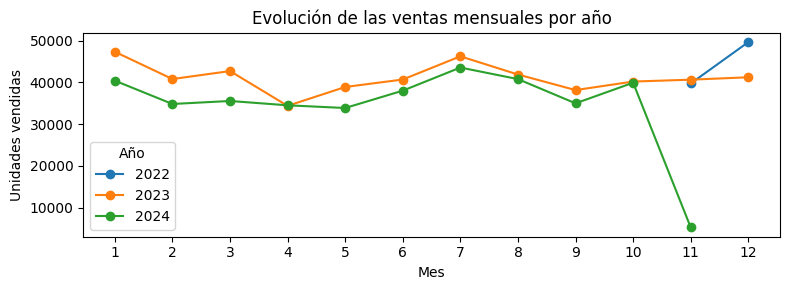

In [9]:
# Crear un dataframe con las ventas acumuladas por mes con una columna para cada año
# para graficar en el eje x los meses y una línea por año
dfSTventasPorMesAnios = dfSTventas.copy()
dfSTventasPorMesAnios['anio'] = dfSTventasPorMesAnios['idSecuencia'].dt.year
dfSTventasPorMesAnios['mes'] = dfSTventasPorMesAnios['idSecuencia'].dt.month
dfSTventasPorMesAnios = dfSTventasPorMesAnios.groupby(['anio', 'mes']).agg({'udsVenta': 'sum'}).reset_index()

# Pivotar para tener una columna por año (pandas.DataFrame.plot no soporta 'hue')
pivot = dfSTventasPorMesAnios.pivot(index='mes', columns='anio', values='udsVenta')

# Asegurar que el índice de meses esté ordenado del 1 al 12 (los meses sin datos quedan como NaN)
pivot = pivot.reindex(range(1, 13))

# Graficar: cada columna (año) será una línea
pivot.plot(marker='o', figsize=(8, 3))
plt.title('Evolución de las ventas mensuales por año')
plt.xlabel('Mes')
plt.ylabel('Unidades vendidas')
plt.xticks(range(1, 13))
plt.legend(title='Año')
plt.tight_layout()
plt.show()

Lo mismo que se ha hecho para los meses pero para las semanas

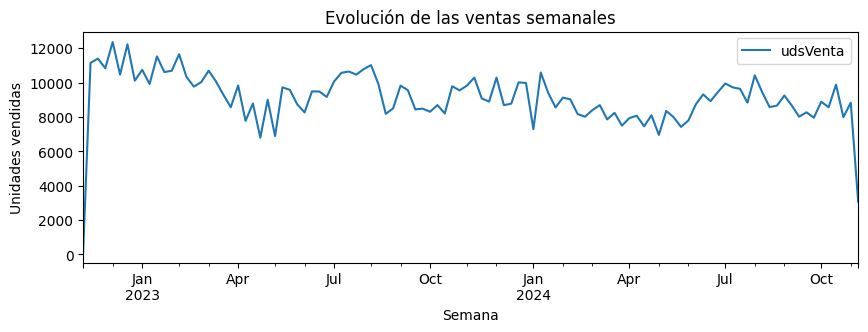

In [10]:
# Crear datafranme con ventas acumuladas por semana
dfSTventasPorSemana = dfSTventas.set_index('idSecuencia').resample('W').agg({'udsVenta': 'sum'}).reset_index()
# Gráfico de ventas acumuladas por semana
dfSTventasPorSemana.plot(x='idSecuencia', y='udsVenta', figsize=(10, 3))
plt.title('Evolución de las ventas semanales')
plt.xlabel('Semana')
plt.ylabel('Unidades vendidas')
plt.show()

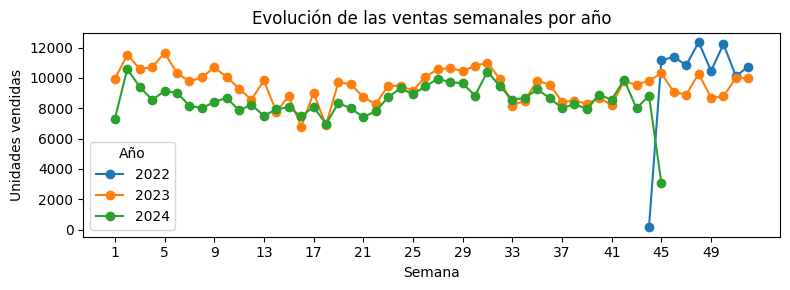

In [11]:
# Crear datafranme con ventas acumuladas por semana y año
dfSTventasPorSemanaAnios = dfSTventas.copy()
dfSTventasPorSemanaAnios['anio'] = dfSTventasPorSemanaAnios['idSecuencia'].dt.year
# Obtener número de semana con isocalendar() (weekofyear está deprecado/no disponible)
dfSTventasPorSemanaAnios['semana'] = dfSTventasPorSemanaAnios['idSecuencia'].dt.isocalendar().week.astype(int)
dfSTventasPorSemanaAnios = dfSTventasPorSemanaAnios.groupby(['anio', 'semana']).agg({'udsVenta': 'sum'}).reset_index()

# Pivotar para tener una columna por año (pandas.DataFrame.plot no soporta 'hue')
pivot = dfSTventasPorSemanaAnios.pivot(index='semana', columns='anio', values='udsVenta')

# Asegurar que el índice de semanas esté ordenado del 1 a la 52 (las semanas sin datos quedan como NaN)
pivot = pivot.reindex(range(1, 53))

# Graficar: cada columna (año) será una línea
pivot.plot(marker='o', figsize=(8, 3))
plt.title('Evolución de las ventas semanales por año')
plt.xlabel('Semana')
plt.ylabel('Unidades vendidas')
# Evitar sobrecargar el eje x: mostrar una etiqueta cada 4 semanas
plt.xticks(range(1, 53, 4))
plt.legend(title='Año')
plt.tight_layout()
plt.show()

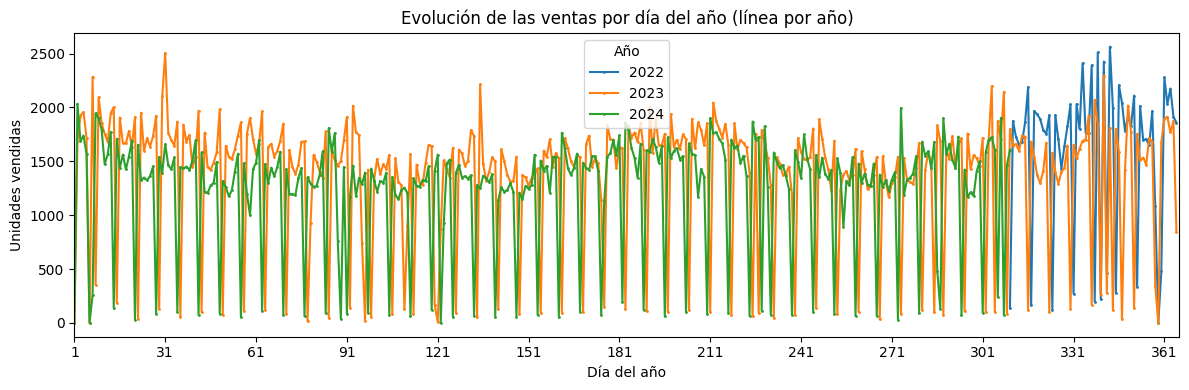

In [12]:
# Gráfico similar al de semanas, pero por número de día del año
# Agrupar ventas por año y día del año
dfSTventasPorDiaAnyo = dfSTventas.copy()
dfSTventasPorDiaAnyo['anio'] = dfSTventasPorDiaAnyo['idSecuencia'].dt.year
# Día del año (1..366)
dfSTventasPorDiaAnyo['dia_anyo'] = dfSTventasPorDiaAnyo['idSecuencia'].dt.dayofyear.astype(int)

# Sumar unidades vendidas por (anio, dia_anyo)
dfSTventasPorDiaAnyo = dfSTventasPorDiaAnyo.groupby(['anio', 'dia_anyo']).agg({'udsVenta': 'sum'}).reset_index()

# Pivotar para tener una columna por año (cada año será una línea)
pivot_dia = dfSTventasPorDiaAnyo.pivot(index='dia_anyo', columns='anio', values='udsVenta')

# Asegurar que el índice cubra todos los días posibles del año (1..366)
pivot_dia = pivot_dia.reindex(range(1, 367))

# Graficar: cada columna (año) será una línea
plt.figure(figsize=(12, 4))
for col in pivot_dia.columns:
    plt.plot(pivot_dia.index, pivot_dia[col], marker='.', markersize=2, label=str(col))

plt.title('Evolución de las ventas por día del año (línea por año)')
plt.xlabel('Día del año')
plt.ylabel('Unidades vendidas')
# Evitar sobrecargar el eje x: mostrar una etiqueta cada 30 días
plt.xticks(range(1, 367, 30))
plt.xlim(1, 366)
plt.legend(title='Año')
plt.tight_layout()
plt.show()


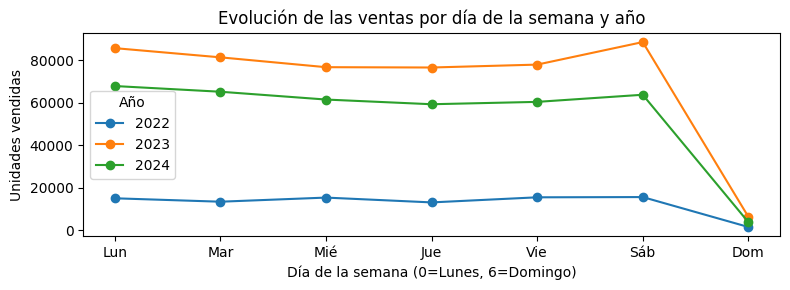

In [13]:
# Crear gráfico tipo plot con eje x los días de la semana y una línea por año, ordenado de lunes a domingo
dfSTventasPorDiaSemanaAnios = dfSTventas.copy()
dfSTventasPorDiaSemanaAnios['anio'] = dfSTventasPorDiaSemanaAnios['idSecuencia'].dt.year
dfSTventasPorDiaSemanaAnios['dia_semana'] = dfSTventasPorDiaSemanaAnios['idSecuencia'].dt.dayofweek  # Lunes=0, Domingo=6
# Agrupar por año y día de la semana
dfSTventasPorDiaSemanaAnios = dfSTventasPorDiaSemanaAnios.groupby(['anio', 'dia_semana']).agg({'udsVenta': 'sum'}).reset_index()
# Pivotar para tener una columna por año
pivot = dfSTventasPorDiaSemanaAnios.pivot(index='dia_semana', columns='anio', values='udsVenta')
# Graficar: cada columna (año) será una línea
pivot.plot(marker='o', figsize=(8, 3))
plt.title('Evolución de las ventas por día de la semana y año')
plt.xlabel('Día de la semana (0=Lunes, 6=Domingo)')
plt.ylabel('Unidades vendidas')
plt.xticks(range(0, 7), ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom'])
plt.legend(title='Año')
plt.tight_layout()
plt.show()


Analisis con gráfico heatmap

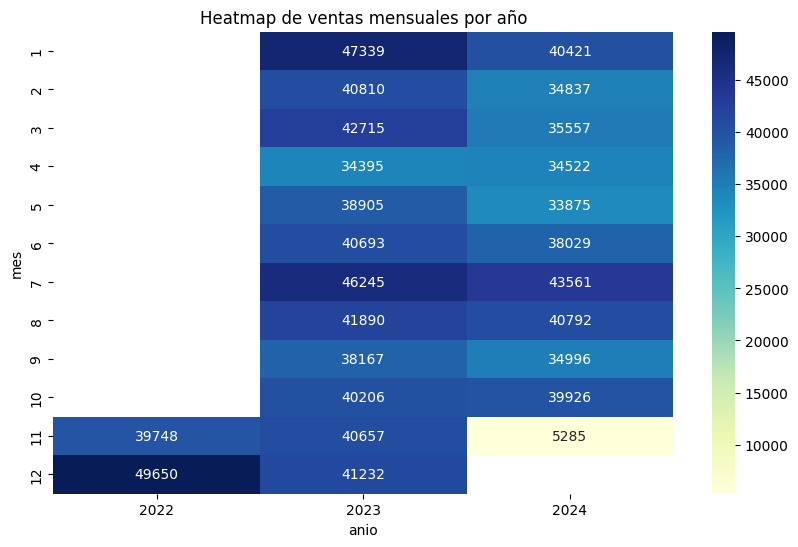

In [14]:
# Gráfico heatmap con el eje y los meses y eje x los años
import seaborn as sns
# Crear tabla pivote con meses como filas, años como columnas y suma de udsVenta como valores
pivot_heatmap = dfSTventasPorMesAnios.pivot(index='mes', columns='anio', values='udsVenta')
# Gráfico heatmap con el eje y los meses y ejex los años
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_heatmap, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap de ventas mensuales por año')
plt.show()

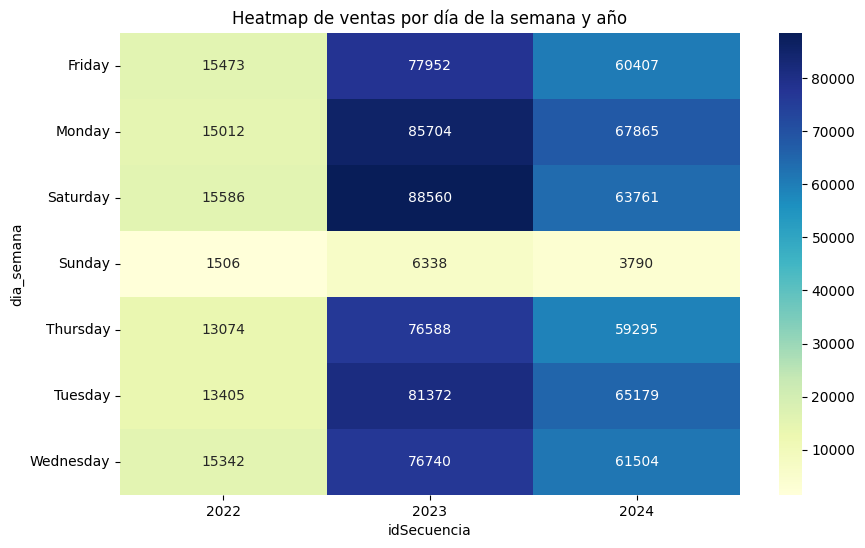

In [15]:
# Gráfico heatmap con el eje y los días de la semana y eje x los años
import seaborn as sns
# Crear columna con el día de la semana
dfSTventas['dia_semana'] = dfSTventas['idSecuencia'].dt.day_name()
# Crear tabla pivote con días de la semana como filas, años como columnas y suma de udsVenta como valores
pivot_heatmap_dia = dfSTventas.groupby(['dia_semana', dfSTventas['idSecuencia'].dt.year]).agg({'udsVenta': 'sum'}).reset_index()
# Gráfico heatmap con el eje y los días de la semana y eje x los años
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_heatmap_dia.pivot(index='dia_semana', columns='idSecuencia', values='udsVenta'), annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap de ventas por día de la semana y año')
plt.show()

Análisis de las características de la serie temporal de ventas

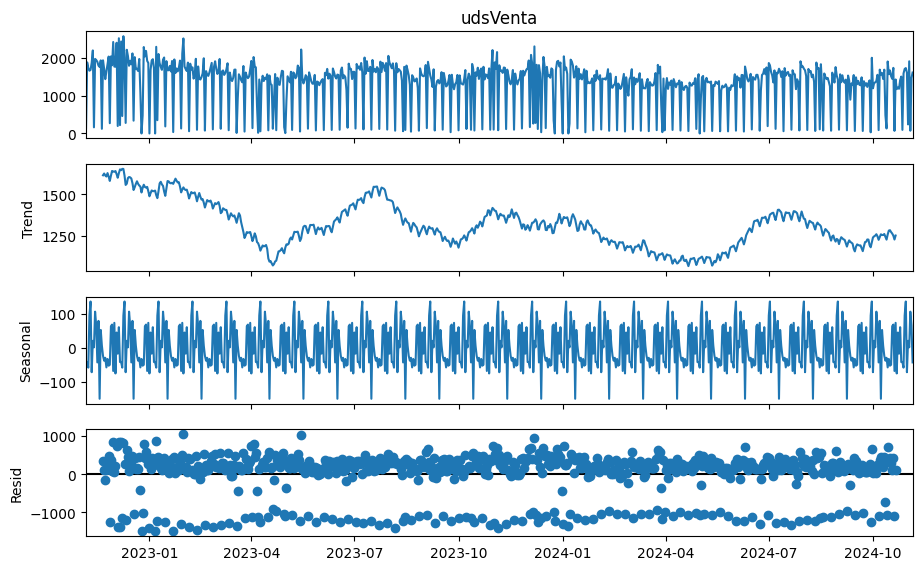

In [16]:
import statsmodels.api as sm
# Análisis de descomposición estacional de la serie temporal de ventas diarias asumiento aditivo y periodo mensual (30 días)
descomposicion = sm.tsa.seasonal_decompose(dfSTventasPorDia.set_index('idSecuencia')['udsVenta'], model='additive', period=30)
fig = descomposicion.plot()
fig.set_size_inches(10, 6)
plt.show()


### Análisis de unidades de venta por producto

In [17]:
# Número de productos únicos
dfSTventasPorProducto = dfSTventas.groupby('producto')['udsVenta'].sum().sort_values(ascending=False).reset_index()
# describe dfSTventasPorProducto
print("\nDescripción de unidades vendidas por producto:")
print(dfSTventasPorProducto.describe())


Descripción de unidades vendidas por producto:
          producto     udsVenta
count   894.000000   894.000000
mean    502.115213  1078.806488
std     291.391762   760.800367
min       1.000000   104.000000
25%     247.250000   593.000000
50%     506.500000   871.500000
75%     753.750000  1334.000000
max    1000.000000  6398.000000


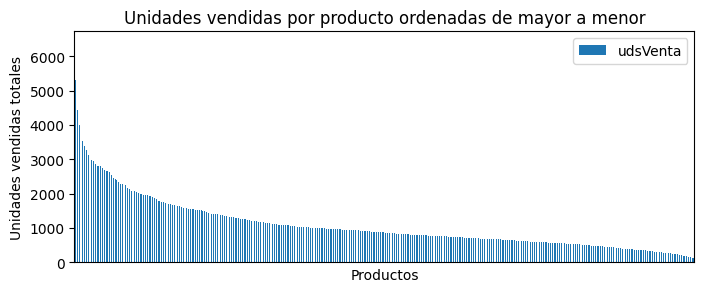

In [18]:
# gráfico de ventas totales por producto
dfSTventasPorProducto.plot(x='producto', y='udsVenta',kind='bar', figsize=(8, 3))
plt.title('Unidades vendidas por producto ordenadas de mayor a menor')
plt.xticks([])
plt.xlabel('Productos')
plt.ylabel('Unidades vendidas totales')
plt.show()

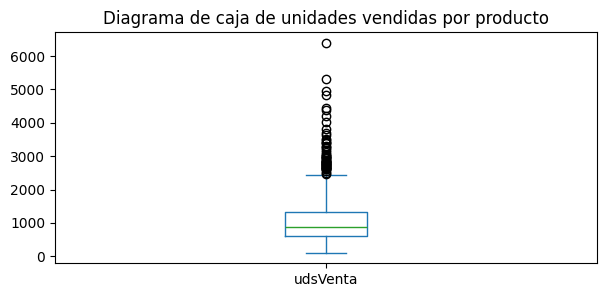

In [ ]:
# Box plot tipo violin de unidades vendidas por producto

dfSTventasPorProducto.udsVenta.plot.box(figsize=(7, 3))
plt.title('Diagrama de caja de unidades vendidas por producto')
plt.show()


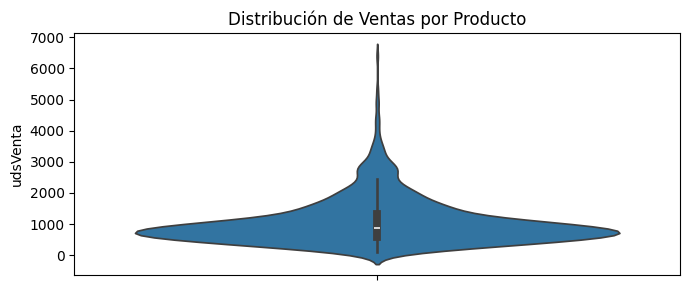

In [20]:
import seaborn as sns
plt.figure(figsize=(7, 3))
sns.violinplot(
    data=dfSTventasPorProducto.udsVenta, 
    inner='box',         # Mostrar boxplot dentro: 'box', 'quartile', 'point', None
    density_norm='width'        # 'width', 'area', 'count'
)
plt.xticks(rotation=45)
plt.title('Distribución de Ventas por Producto')
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

NameError: name 'np' is not defined

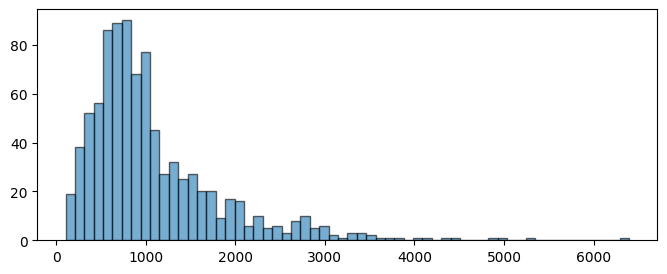

In [21]:
# histograma de unidades vendidas por producto con línea que simula el histograma

import numpy as np


plt.figure(figsize=(8, 3))
counts, bins, patches = plt.hist(dfSTventasPorProducto.udsVenta, bins=60, edgecolor='black', alpha=0.6)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Línea suavizada (media móvil) para una curva más limpia
smooth = np.convolve(counts, np.ones(5) / 5, mode='same')
plt.plot(bin_centers, smooth, color='blue', lw=2, label='Linea suavizada')

plt.title('Histograma de Unidades Vendidas por Producto')
plt.xlabel('Unidades vendidas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [ ]:
# Listar los productos con más ventas
dfSTventasPorProducto.nlargest(10, 'udsVenta')

,producto,udsVenta
0,1,6398
1,2,5318
2,9,4941
3,78,4833
4,13,4432
5,7,4377
6,15,4193
7,391,4010
8,3,3810
9,150,3692


In [ ]:
# Listar los productos con menos ventas
dfSTventasPorProducto.nsmallest(10, 'udsVenta')

,producto,udsVenta
893,745,104
892,422,116
891,832,127
890,958,149
889,720,151
888,350,153
887,941,161
886,913,162
885,815,163
884,548,168


C:\Users\jmora\AppData\Local\Temp\ipykernel_23228\3535029223.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='anio', y='udsVenta', data=df_year_prod, palette='Set3')
C:\Users\jmora\AppData\Local\Temp\ipykernel_23228\3535029223.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mes', y='udsVenta', data=df_month_prod, order=order_months, palette='Set2')
C:\Users\jmora\AppData\Local\Temp\ipykernel_23228\3535029223.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dow', y='udsVenta', data=df_dow_prod, order=order_dow, palette='

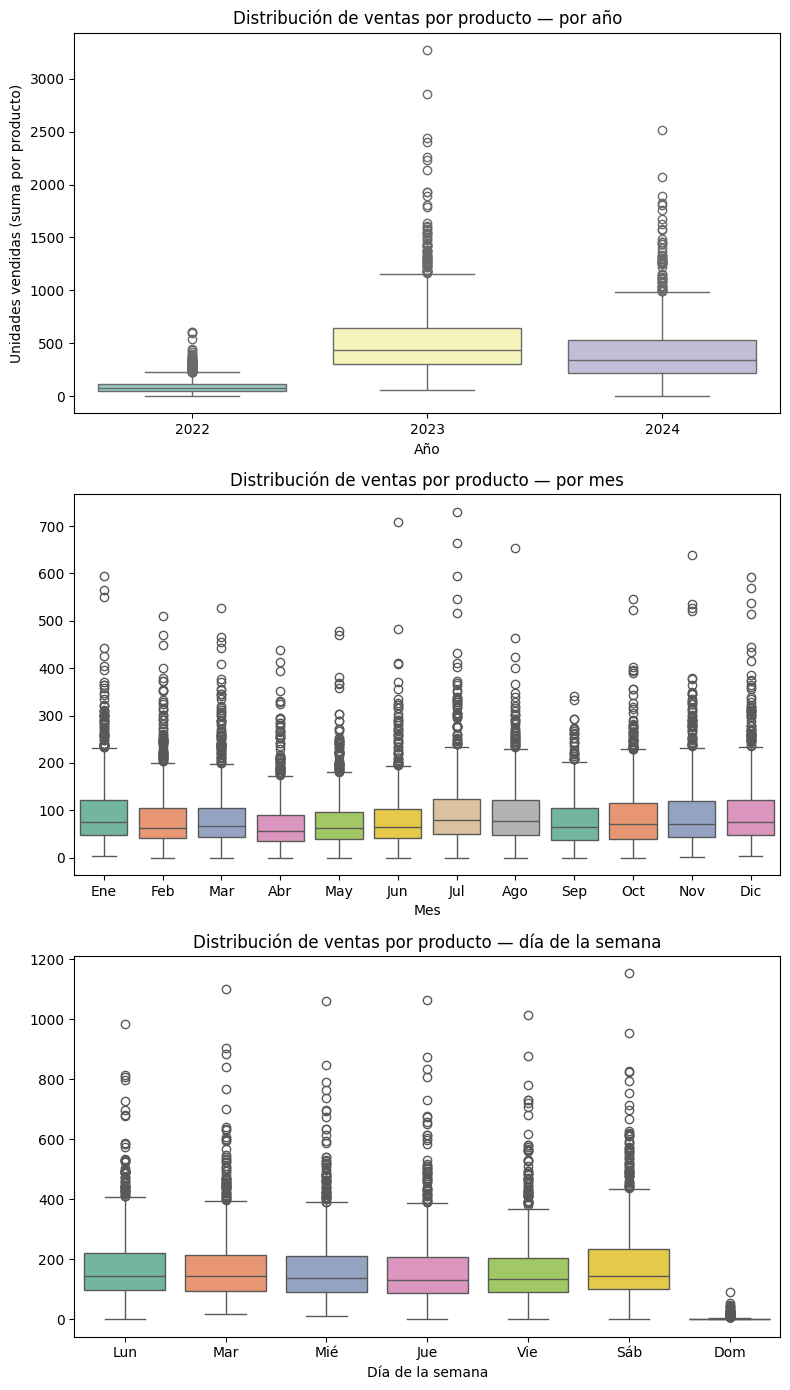

In [45]:
# Boxplots de la suma de ventas por producto: por año, por mes y por día de la semana
# Se calcula la suma de ventas por producto en cada periodo (filtrando solo días abiertos)

df_box = dfSTventas.copy()
# Filtrar días abiertos
if 'bolOpen' in df_box.columns:
    df_box = df_box[df_box['bolOpen'] != 0]

# Añadir columnas de periodo
df_box['anio'] = df_box['idSecuencia'].dt.year
df_box['mes'] = df_box['idSecuencia'].dt.month
# Nombres cortos de mes en Español (Ene, Feb, ...)
mes_labels = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

df_box['dow'] = df_box['idSecuencia'].dt.dayofweek  # 0=Lunes .. 6=Domingo
dow_labels = ['Lun','Mar','Mié','Jue','Vie','Sáb','Dom']

# Agregar: suma de ventas por (periodo, producto)
df_year_prod = df_box.groupby(['anio','producto'], as_index=False).agg({'udsVenta':'sum'})
df_month_prod = df_box.groupby(['mes','producto'], as_index=False).agg({'udsVenta':'sum'})
df_dow_prod = df_box.groupby(['dow','producto'], as_index=False).agg({'udsVenta':'sum'})

import matplotlib.pyplot as plt
import seaborn as sns

# Usar 3 filas x 1 columna para mayor legibilidad vertical
plt.figure(figsize=(8, 14))

# 1) Boxplot por año
plt.subplot(3, 1, 1)
sns.boxplot(x='anio', y='udsVenta', data=df_year_prod, palette='Set3')
plt.title('Distribución de ventas por producto — por año')
plt.xlabel('Año')
plt.ylabel('Unidades vendidas (suma por producto)')

# 2) Boxplot por mes (Ene..Dic)
plt.subplot(3, 1, 2)
# Usar order para garantizar 1..12
order_months = list(range(1, 13))
sns.boxplot(x='mes', y='udsVenta', data=df_month_prod, order=order_months, palette='Set2')
# Re-etiquetar ticks a nombres de meses: posiciones 0..11
plt.xticks(ticks=range(len(order_months)), labels=mes_labels)
plt.title('Distribución de ventas por producto — por mes')
plt.xlabel('Mes')
plt.ylabel('')

# 3) Boxplot por día de la semana (Lun..Dom)
plt.subplot(3, 1, 3)
order_dow = list(range(0,7))
sns.boxplot(x='dow', y='udsVenta', data=df_dow_prod, order=order_dow, palette='Set2')
plt.xticks(ticks=order_dow, labels=dow_labels)
plt.title('Distribución de ventas por producto — día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('')

plt.tight_layout()
plt.show()


Productos agrupados por clusters según sus ventas totales:
     producto  udsVenta  Cluster
318       290      1054        0
317       462      1056        0
316       425      1057        0
315       669      1057        0
314       172      1057        0
..        ...       ...      ...
434       309       889        3
433       547       889        3
432       995       891        3
431       867       891        3
430       796       891        3

[894 rows x 3 columns]

Número de productos por cluster:
Cluster
3    464
0    303
1    107
2     20
Name: count, dtype: int64

Ventas totales por cluster:
Cluster
0    368275
1    246600
2     79809
3    269769
Name: udsVenta, dtype: int64


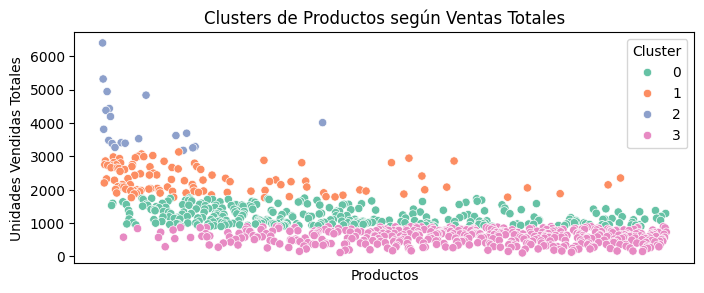

In [ ]:
# Crear N clusters de productos según sus ventas totales
from sklearn.cluster import KMeans
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(dfSTventasPorProducto[['udsVenta']])
dfSTventasPorProducto['Cluster'] = kmeans.labels_
print("\nProductos agrupados por clusters según sus ventas totales:")
print(dfSTventasPorProducto.sort_values('Cluster'))
# mostrar cuantos productos tiene cada cluster
print("\nNúmero de productos por cluster:")
print(dfSTventasPorProducto['Cluster'].value_counts())
# mostrar cuantas ventas totales tiene cada cluster
print("\nVentas totales por cluster:")
print(dfSTventasPorProducto.groupby('Cluster')['udsVenta'].sum())
# Mostrar gráfico de los clusters
plt.figure(figsize=(8, 3))
sns.scatterplot(data=dfSTventasPorProducto, x='producto', y='udsVenta', hue='Cluster', palette='Set2', legend='full')
plt.title('Clusters de Productos según Ventas Totales')
plt.xticks([])
plt.xlabel('Productos')
plt.ylabel('Unidades Vendidas Totales')
plt.legend(title='Cluster')
plt.show()
